<a href="https://colab.research.google.com/github/Samuyel-256/Edunet/blob/main/Decision_Tree_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as nm

import matplotlib.pyplot as mtp

import pandas as pd


In [2]:
data_set= pd.read_csv('/content/User_Data_1.csv')

In [3]:
data_set.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
x= data_set.iloc[:, [2,3]].values

y= data_set.iloc[:, 4].values

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

In [6]:
from sklearn.preprocessing import StandardScaler

st_x= StandardScaler()

x_train= st_x.fit_transform(x_train)

x_test= st_x.transform(x_test)

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
from sklearn import tree
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
clf=classifier.fit(x_train, y_train)
clf

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [9]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 0.63
|   |--- feature_1 <= 0.61
|   |   |--- feature_0 <= -0.16
|   |   |   |--- class: 0
|   |   |--- feature_0 >  -0.16
|   |   |   |--- feature_1 <= -0.06
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  -0.06
|   |   |   |   |--- feature_1 <= 0.40
|   |   |   |   |   |--- feature_1 <= 0.03
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  0.03
|   |   |   |   |   |   |--- feature_1 <= 0.26
|   |   |   |   |   |   |   |--- feature_1 <= 0.08
|   |   |   |   |   |   |   |   |--- feature_0 <= 0.14
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_0 >  0.14
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 0.06
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.24
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  0.24
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   

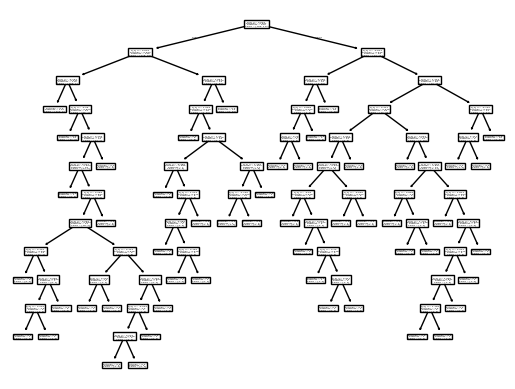

array([[62,  6],
       [ 3, 29]])

In [10]:
tree.plot_tree(clf)

mtp.show()

y_pred= classifier.predict(x_test)

from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y_test, y_pred)

cm


In [11]:
# Import necessary libraries
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import numpy as np  # Ensure to use the proper alias 'np' instead of 'nm'
import matplotlib.pyplot as plt
import warnings


Accuracy:  0.91


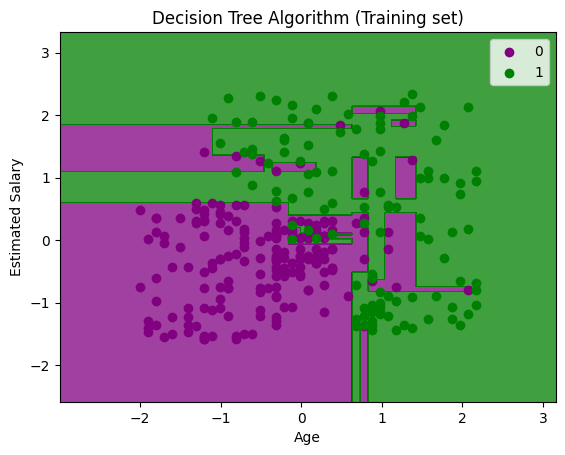

In [12]:

# Ignore warnings
warnings.filterwarnings("ignore")

# Accuracy score calculation
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Visualizing the training set results
x_set, y_set = x_train, y_train  # Assuming these variables are defined
x1, x2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
    np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01)
)

plt.contourf(
    x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
    alpha=0.75, cmap=ListedColormap(('purple', 'green'))
)
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        x_set[y_set == j, 0], x_set[y_set == j, 1],
        c=ListedColormap(('purple', 'green'))(i), label=j
    )

plt.title('Decision Tree Algorithm (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()